In [65]:
import numpy as np
import math

def read_dataset(filepath):
    """
    Read .txt file from a specified filepath. (i.e. data/train_full.txt)
    Returns 2 numpy arrays of the instances and the labels
    """
    data = np.loadtxt(filepath, dtype=str, delimiter=",")
    instances = data[:,:-1]
    instances = instances.astype(int)
    labels = data[:,-1]

    return instances, labels

In [66]:
train_full_instances, train_full_labels = read_dataset("data/train_full.txt")
train_sub_instances, train_sub_labels = read_dataset("data/train_sub.txt")
train_noisy_instances, train_noisy_labels = read_dataset("data/train_noisy.txt")

Look at the datasets train full.txt, train sub.txt, and train noisy.txt (you can examine the raw text files directly or via Python). There are many questions you can ask yourself: 

How many samples/instances are there? Will that be enough to train a classifier? 

In [67]:
print("Train Full Instances Shape: ", train_full_instances.shape)
print("Train Noisy Instances Shape: ", train_noisy_instances.shape)
print("Train Sub Instances Shape: ", train_sub_instances.shape)

Train Full Instances Shape:  (3900, 16)
Train Noisy Instances Shape:  (3900, 16)
Train Sub Instances Shape:  (600, 16)


How many unique class labels (characters to be recognised) are there?

In [68]:
print("Train Full Labels: ",np.unique(train_full_labels))
print("Train Full Label Count: ", len(np.unique(train_full_labels)))
print("Train Sub Labels: ",np.unique(train_sub_labels))
print("Train Sub Label Count: ", len(np.unique(train_sub_labels)))

Train Full Labels:  ['A' 'C' 'E' 'G' 'O' 'Q']
Train Full Label Count:  6
Train Sub Labels:  ['A' 'C' 'E' 'G' 'O' 'Q']
Train Sub Label Count:  6


 What is the distribution across the classes (e.g. 40% 'A's, 20% 'C's)? Are the samples balanced across all the classes, or are they biased towards one or two classes? 

In [69]:
print("Train Full Distribution")
labels, count = np.unique(train_full_labels, return_counts=True)
for i in range(0, len(labels)):
    print(f"{labels[i]}: {(count[i]/(np.sum(count))*100):.2f}%")

Train Full Distribution
A: 17.10%
C: 15.36%
E: 16.90%
G: 17.21%
O: 16.33%
Q: 17.10%


In [70]:
print("Train Sub Distribution")
labels, count = np.unique(train_sub_labels, return_counts=True)
for i in range(0, len(labels)):
    print(f"{labels[i]}: {(count[i]/(np.sum(count))*100):.2f}%")

Train Sub Distribution
A: 15.67%
C: 31.17%
E: 21.50%
G: 3.50%
O: 18.83%
Q: 9.33%


What does each of the 16 attributes represent?

- 0: x-box (integer)
	- horizontal position of box
- 1: y-box (integer)
	- vertical position of box
- 2: width (integer)
	- width of box
- 3: high (integer)
	- height of box
- 4: onpix (integer)
	- total # on pixels
- 5: x-bar (integer)
	- mean x of on pixels in box
- 6: y-bar (integer)
	- mean y of on pixels in box
- 7: x2bar (integer)
	- mean x variance
- 8: y2bar (integer)
	- mean y variance
- 9: xybar (integer)
	- mean x y correlation
- 10: x2ybr (integer)
	- mean of x * x * y
- 11: xy2br (integer)
	- mean of x * y * y
- 12: x-ege (integer)
	- mean edge count left to right
- 13: xegvy (integer)
	- correlation of x-ege with y
- 14: y-ege (integer)
	- mean edge count bottom to top
- 15: yegvx (integer)
	- correlation of y-ege with x



What kind of attributes are provided in the dataset (Binary? Categorical/Discrete? Integers? Real numbers?) What are the ranges for each attribute in train full.txt?

In [71]:
labels_header=["x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr" , "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
print("Train Full Min/Max")
for i in range(train_full_instances.shape[1]):
    print(f"{labels_header[i]}: Min = {min(train_full_instances[:][i])}, Max = {max(train_full_instances[:][i])}")
    

Train Full Min/Max
x-box: Min = 2, Max = 10
y-box: Min = 2, Max = 9
width: Min = 0, Max = 10
high: Min = 1, Max = 12
onpix: Min = 1, Max = 8
x-bar: Min = 1, Max = 9
y-bar: Min = 5, Max = 11
x2bar: Min = 2, Max = 10
y2bar: Min = 2, Max = 10
xybar: Min = 2, Max = 11
x2ybr: Min = 1, Max = 8
xy2br: Min = 0, Max = 14
x-ege: Min = 2, Max = 12
xegvy: Min = 2, Max = 13
y-ege: Min = 3, Max = 14
yegvx: Min = 0, Max = 12


train_noisy.txt is actually a corrupted version of train_full.txt, where we have replaced the ground truth labels with the output of a simple automatic classifier. What proportion of labels in train_noisy.txt is different than from those in train_full.txt? (Note that the observations in both datasets are the same, although the ordering is different).

In [72]:
# Create a new dtype so we can use intersect1d with 2D arrays
nrows, ncols = train_full_instances.shape
dtype={'names':['f{}'.format(i) for i in range(ncols)],
       'formats':ncols * [train_full_instances.dtype]}

intersect, indices_full, indices_noisy = np.intersect1d(train_full_instances.view(dtype), train_noisy_instances.view(dtype), return_indices=True)

count_same_labels = np.count_nonzero(train_full_labels[indices_full] == train_noisy_labels[indices_noisy])
print(f"Proportion of different labels:  {((nrows-count_same_labels)/nrows)*100:.2f}%")


Proportion of different labels:  18.54%


Has the class distribution been affected? Specify which classes have a substantially larger or smaller number of examples in train_noisy.txt compared to train_-full.txt.

In [73]:
labels, count_full = np.unique(train_full_labels, return_counts=True)
labels, count_noisy = np.unique(train_noisy_labels, return_counts=True)
print("Class Distribution")
for i in range(0, len(labels)):
    print(f"{labels[i]}: Full = {(count_full[i]/(np.sum(count_full))*100):.2f}%, Noisy = {(count_noisy[i]/(np.sum(count_noisy))*100):.2f}%")

Class Distribution
A: Full = 17.10%, Noisy = 17.46%
C: Full = 15.36%, Noisy = 14.64%
E: Full = 16.90%, Noisy = 17.38%
G: Full = 17.21%, Noisy = 15.95%
O: Full = 16.33%, Noisy = 17.08%
Q: Full = 17.10%, Noisy = 17.49%


In [74]:
# 1) Implement a tree data structure in Python - standard lib or np data structure for this?
# 2) Implement find_best_node(dataset) function
# 2.1) Find the split_point(dataset) for an attribute - start with binary?
# 2.1.1) Sort the values of the attribute
# 2.1.2) Store split point between two examples that have different class labels + the num of pos/neg examples each side (what is pos/neg here?)
# 2.1.3) Select the most suitable split point based off the pos/neg examples
# 2.2) Find information_gain(dataset[attr]) for an attribute
# 2.2.1) Calc H(S_parent) - H'(S_children)
# 2.3) Iterate across each attribute and store information gain + split
# 3) Split dataset on attribute with largest information gain + split location
# 4) Implement recursive induce_decision_tree function w/ above sub functions

In [75]:
def get_entropy(data, labels):
  H_total = 0
  for label in np.unique(labels):
      probability = len(data[labels==label]) / len(data)
      H_total -= probability * np.log2(probability)
  
  return H_total


In [76]:
def get_information_gain(instances_col, labels):
    """Find the information gain for an attribute
    Args:
    instances_col (numpy.ndarray): Instances Column, numpy array of shape (N, )
                       N is the number of instances
    labels (numpy.ndarray): Class labels, numpy array of shape (N, )
                       Each element in labels is a str
    Returns:
      best_attr_index: The index to the column that we want to split the data on
      best_split_index: The index to to the split point in the column
    """
    total_entropy = get_entropy(instances_col, labels)
    max_info_gain = 0
    split_index = 0
    for index in range(1, len(instances_col)):
        # Split on attribute where attr and class label change
        if (
            labels[index] != labels[index - 1]
            and instances_col[index] != instances_col[index - 1]
        ):
            # Make the split
            split_instances_left = instances_col[:index]
            split_instances_right = instances_col[index:]
            split_labels_left = labels[:index]
            split_labels_right = labels[index:]
            # Get the entropy of each data set
            entropy_left = get_entropy(split_instances_left, split_labels_left)
            entropy_right = get_entropy(split_instances_right, split_labels_right)
            # Get the information gain
            info_gain = (
                total_entropy
                - (len(split_instances_left) / len(instances_col)) * entropy_left
                - (len(split_instances_right) / len(instances_col)) * entropy_right
            )
            # Check if this split leads to the highest information gain
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                split_index = index
    return max_info_gain, split_index

In [77]:
def find_best_node(instances, labels):
    """Find the best point to create a node in the decision tree
    Args:
    instances (numpy.ndarray): Instances, numpy array of shape (N, K)
                       N is the number of instances
                       K is the number of attributes
    labels (numpy.ndarray): Class labels, numpy array of shape (N, )
                       Each element in labels is a str
    Returns:
      best_attr_index: The index to the column that we want to split the data on
      best_split_index: The index to to the split point in the column
    """
    best_attr_index = 0
    max_info_gain = 0
    best_split_index = 0
    for index in range(0, len(instances[0, :])):
        indices = instances[:, index].argsort()  # returns sorted indices
        sorted_instances = instances[indices]  # sort the instances based off sorted col
        sorted_labels = labels[indices]  # sort the labels based off the sorted col
        # Calculate the info gain and optimal split index for a given attribute
        info_gain, split_index = get_information_gain( 
            sorted_instances[:, index], sorted_labels
        )
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_attr_index = index
            best_split_index = split_index

    # Return the best attribute to split on, and the value at which we want to split
    return best_attr_index, best_split_index

In [78]:
# Split the dataset - change to take a node later
def split_dataset(sorted_instances, sorted_labels, best_split):
  split_instances_left = sorted_instances[:best_split, :]
  split_instances_right = sorted_instances[best_split:, :]
  split_labels_left = sorted_labels[:best_split]
  split_labels_right = sorted_labels[best_split:]
  return split_instances_left, split_instances_right, split_labels_left, split_labels_right

In [79]:
#Leaf node, bottom of the tree, no more data split after this point
class Leaf_Node:
  def __init__(self, labels, depth):
      self.label = max(set(labels), key=labels.tolist().count)
      self.depth = depth

  def __repr__(self):
    return f"Node({self.depth}) [Label: {self.label}]"

  def predict(self, instance):
    return self.label

#Decision node, contains rule on how to split data, and reference to 
class Decision_Node:
  def __init__(self, attribute, value, left, right, depth):
      self.left = left
      self.right = right
      self.attribute = attribute
      self.value = value
      self.depth = depth

  def __repr__(self):
    tab = "\t"
    return f"Node({self.depth}) [Attribute: {self.attribute} Value: {self.value}] \
      \n {tab * self.depth} L -> {self.left} \
      \n {tab * self.depth} R -> {self.right}"

  def predict(self, instance):
    if instance[self.attribute] < self.value:
      return self.left.predict(instance)
    else:
      return self.right.predict(instance)



In [57]:
      
#From this function, return reference to root node
def induce_decision_tree(instances, labels, depth=0):
  #Split this data into tow, left and right
  best_attr, best_split = find_best_node(instances, labels)

  sorted_indices = instances[:, best_attr].argsort() # returns sorted indices
  sorted_instances = instances[sorted_indices] # sort the instances based off sorted col
  sorted_labels = labels[sorted_indices] # sort the labels based off the sorted col

  split_instances_left, split_instances_right, split_labels_left, split_labels_right = split_dataset(sorted_instances, sorted_labels, best_split)

  #If we can no longer split data, return a leaf node
  if len(set(labels)) == 1 or len(split_instances_left) == 0 or len(split_instances_right) == 0:
    return Leaf_Node(labels, depth)

  LeftNode = induce_decision_tree(split_instances_left, split_labels_left, depth+1)
  RightNode = induce_decision_tree(split_instances_right, split_labels_right, depth+1) 

  # what to return if left node or right node does not exist
  return Decision_Node(best_attr, sorted_instances[best_split][best_attr], LeftNode, RightNode, depth)


instances, labels = read_dataset("data/train_full.txt")
root = induce_decision_tree(instances, labels)

#print(root)

# print(root.predict([3,5,4,6,2,8,8,7,5,5,8,9,3,8,5,9]))


AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
x_test, y_test = read_dataset("data/test.txt")
predictions = np.zeros((x_test.shape[0],), dtype=np.object)
for i, instance in enumerate(x_test):
  predictions[i] = root.predict(instance)
print(predictions.shape)
print(np.count_nonzero(predictions == y_test))
print(root)

def dfs(node):
  if node is None:
    return 0
  
  if isinstance(node, Leaf_Node):
    return node.depth

  return max(node.depth, dfs(node.left), dfs(node.right))

print(dfs(root))

(200,)
177
Node(0) [Attribute: 10 Value: 3]       
  L -> Node(1) [Attribute: 15 Value: 13]       
 	 L -> Node(2) [Attribute: 15 Value: 10]       
 		 L -> Node(3) [Attribute: 0 Value: 6]       
 			 L -> Node(4) [Label: A]       
 			 R -> Node(4) [Attribute: 2 Value: 11]       
 				 L -> Node(5) [Label: G]       
 				 R -> Node(5) [Label: A]       
 		 R -> Node(3) [Attribute: 5 Value: 12]       
 			 L -> Node(4) [Label: G]       
 			 R -> Node(4) [Label: A]       
 	 R -> Node(2) [Label: Q]       
  R -> Node(1) [Attribute: 5 Value: 7]       
 	 L -> Node(2) [Attribute: 14 Value: 5]       
 		 L -> Node(3) [Attribute: 11 Value: 11]       
 			 L -> Node(4) [Attribute: 7 Value: 5]       
 				 L -> Node(5) [Attribute: 8 Value: 7]       
 					 L -> Node(6) [Attribute: 3 Value: 6]       
 						 L -> Node(7) [Attribute: 5 Value: 6]       
 							 L -> Node(8) [Label: C]       
 							 R -> Node(8) [Label: E]       
 						 R -> Node(7) [Attribute: 6 Value: 7]       
 							 L 

/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/3547450893.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.zeros((x_test.shape[0],), dtype=np.object)


In [ ]:
def confusion_matrix(y_gold, y_prediction, class_labels=None):
    """ Compute the confusion matrix.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels
        class_labels (np.ndarray): a list of unique class labels. 
                               Defaults to the union of y_gold and y_prediction.

    Returns:
        np.array : shape (C, C), where C is the number of classes. 
                   Rows are ground truth per class, columns are predictions
    """

    # if no class_labels are given, we obtain the set of unique class labels from
    # the union of the ground truth annotation and the prediction
    if not class_labels:
        class_labels = np.unique(np.concatenate((y_gold, y_prediction)))

    confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)

    # for each correct class (row), 
    # compute how many instances are predicted for each class (columns)
    for (i, label) in enumerate(class_labels):
        # get predictions where the ground truth is the current class label
        indices = (y_gold == label)
        gold = y_gold[indices]
        predictions = y_prediction[indices]

        # quick way to get the counts per label
        (unique_labels, counts) = np.unique(predictions, return_counts=True)

        # convert the counts to a dictionary
        frequency_dict = dict(zip(unique_labels, counts))

        # fill up the confusion matrix for the current row
        for (j, class_label) in enumerate(class_labels):
            confusion[i, j] = frequency_dict.get(class_label, 0)

    return confusion

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[32  0  0  0  1  1]
 [ 0 34  2  1  0  0]
 [ 0  1 25  0  0  0]
 [ 0  0  0 26  1  0]
 [ 0  2  0  0 26  6]
 [ 0  0  0  0  2 40]]


/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/3933096852.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)


In [ ]:
def accuracy(y_gold, y_prediction):
    """ Compute the accuracy given the ground truth and predictions

    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        float : the accuracy
    """

    assert len(y_gold) == len(y_prediction)  
    
    try:
        return np.sum(y_gold == y_prediction) / len(y_gold)
    except ZeroDivisionError:
        return 0.

# Compute accuracy on predictions for RandomClassifier and KNNClassifier from earlier
print(accuracy(y_test, predictions))

0.915


In [ ]:
def precision(y_gold, y_prediction):
    """ Compute the precision score per class given the ground truth and predictions
        
    Also return the macro-averaged precision across classes.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        tuple: returns a tuple (precisions, macro_precision) where
            - precisions is a np.ndarray of shape (C,), where each element is the 
              precision for class c
            - macro-precision is macro-averaged precision (a float) 
    """

    confusion = confusion_matrix(y_gold, y_prediction)
    p = np.zeros((len(confusion), ))
    for c in range(confusion.shape[0]):
        if np.sum(confusion[:, c]) > 0:
            p[c] = confusion[c, c] / np.sum(confusion[:, c])

    ## Alternative solution without computing the confusion matrix
    #class_labels = np.unique(np.concatenate((y_gold, y_prediction)))
    #p = np.zeros((len(class_labels), ))
    #for (c, label) in enumerate(class_labels):
    #    indices = (y_prediction == label) # get instances predicted as label
    #    correct = np.sum(y_gold[indices] == y_prediction[indices]) # intersection
    #    if np.sum(indices) > 0:
    #        p[c] = correct / np.sum(indices)     

    # Compute the macro-averaged precision
    macro_p = 0.
    if len(p) > 0:
        macro_p = np.mean(p)
    
    return (p, macro_p)


In [ ]:
(p, macro_p) = precision(y_test, predictions)
print(p)
print(macro_p)

[1.         0.91891892 0.92592593 0.96296296 0.86666667 0.85106383]
0.9209230507102847


/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/3933096852.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)


In [ ]:
def recall(y_gold, y_prediction):
    """ Compute the recall score per class given the ground truth and predictions
        
    Also return the macro-averaged recall across classes.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        tuple: returns a tuple (recalls, macro_recall) where
            - recalls is a np.ndarray of shape (C,), where each element is the 
                recall for class c
            - macro-recall is macro-averaged recall (a float) 
    """

    confusion = confusion_matrix(y_gold, y_prediction)
    r = np.zeros((len(confusion), ))
    for c in range(confusion.shape[0]):
        if np.sum(confusion[c, :]) > 0:
            r[c] = confusion[c, c] / np.sum(confusion[c, :])

    ## Alternative solution without computing the confusion matrix
    #class_labels = np.unique(np.concatenate((y_gold, y_prediction)))
    #r = np.zeros((len(class_labels), ))
    #for (c, label) in enumerate(class_labels):
    #    indices = (y_gold == label) # get instances for current label
    #    correct = np.sum(y_gold[indices] == y_prediction[indices]) # intersection
    #    if np.sum(indices) > 0:
    #        r[c] = correct / np.sum(indices)     

    # Compute the macro-averaged recall
    macro_r = 0.
    if len(r) > 0:
        macro_r = np.mean(r)
    
    return (r, macro_r)


In [ ]:
(r, macro_r) = recall(y_test, predictions)
print(r)
print(macro_r)


/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/3933096852.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)


[0.94117647 0.91891892 0.96153846 0.96296296 0.76470588 0.95238095]
0.9169472747904122


In [ ]:
def f1_score(y_gold, y_prediction):
    """ Compute the F1-score per class given the ground truth and predictions
        
    Also return the macro-averaged F1-score across classes.
        
    Args:
        y_gold (np.ndarray): the correct ground truth/gold standard labels
        y_prediction (np.ndarray): the predicted labels

    Returns:
        tuple: returns a tuple (f1s, macro_f1) where
            - f1s is a np.ndarray of shape (C,), where each element is the 
              f1-score for class c
            - macro-f1 is macro-averaged f1-score (a float) 
    """

    (precisions, macro_p) = precision(y_gold, y_prediction)
    (recalls, macro_r) = recall(y_gold, y_prediction)

    # just to make sure they are of the same length
    assert len(precisions) == len(recalls)

    f = np.zeros((len(precisions), ))
    for c, (p, r) in enumerate(zip(precisions, recalls)):
        if p + r > 0:
            f[c] = 2 * p * r / (p + r)

    # Compute the macro-averaged F1
    macro_f = 0.
    if len(f) > 0:
        macro_f = np.mean(f)
    
    return (f, macro_f)

In [ ]:
(f1, macro_f1) = f1_score(y_test, predictions)
print(f1)
print(macro_f1)

[0.96969697 0.91891892 0.94339623 0.96296296 0.8125     0.8988764 ]
0.9177252470813878


/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/3933096852.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion = np.zeros((len(class_labels), len(class_labels)), dtype=np.int)


In [ ]:
from numpy.random import default_rng

def k_fold_split(n_splits, n_instances, random_generator=default_rng()):
    """ Split n_instances into n mutually exclusive splits at random.
    
    Args:
        n_splits (int): Number of splits
        n_instances (int): Number of instances to split
        random_generator (np.random.Generator): A random generator

    Returns:
        list: a list (length n_splits). Each element in the list should contain a 
            numpy array giving the indices of the instances in that split.
    """

    # generate a random permutation of indices from 0 to n_instances
    shuffled_indices = random_generator.permutation(n_instances)

    # split shuffled indices into almost equal sized splits
    split_indices = np.array_split(shuffled_indices, n_splits)

    return split_indices


In [ ]:
def train_test_k_fold(n_folds, n_instances, random_generator=default_rng()):
    """ Generate train and test indices at each fold.
    
    Args:
        n_folds (int): Number of folds
        n_instances (int): Total number of instances
        random_generator (np.random.Generator): A random generator

    Returns:
        list: a list of length n_folds. Each element in the list is a list (or tuple) 
            with two elements: a numpy array containing the train indices, and another 
            numpy array containing the test indices.
    """

    # split the dataset into k splits
    split_indices = k_fold_split(n_folds, n_instances, random_generator)

    folds = []
    for k in range(n_folds):
        # pick k as test
        test_indices = split_indices[k]

        # combine remaining splits as train
        # this solution is fancy and worked for me
        # feel free to use a more verbose solution that's more readable
        train_indices = np.hstack(split_indices[:k] + split_indices[k+1:])

        folds.append([train_indices, test_indices])

    return folds


In [ ]:

# For quick testing
seed = 60012
rg = default_rng(seed)
n_folds = 10
accuracies = np.zeros((n_folds, ))
for i, (train_indices, test_indices) in enumerate(train_test_k_fold(n_folds, len(instances), rg)):
    # get the dataset from the correct splits
    x_train = instances[train_indices, :]
    y_train = labels[train_indices]
    x_test = instances[test_indices, :]
    y_test = labels[test_indices]
    predictions = np.zeros((test_indices.shape[0],), dtype=np.object)
    root = induce_decision_tree(x_train, y_train)
    for j, instance in enumerate(x_test):
        predictions[j] = root.predict(instance)   
    acc = accuracy(y_test, predictions)
    accuracies[i] = acc
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

/var/folders/w5/srtbhlhs71jcqz1khzsh_n3w0000gn/T/ipykernel_42454/2173650932.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.zeros((test_indices.shape[0],), dtype=np.object)


[0.93846154 0.90512821 0.92051282 0.93589744 0.93589744 0.92820513
 0.90769231 0.92051282 0.92051282 0.87948718]
0.9192307692307693
0.01709508543670081


In [100]:
import math
from numpy.random import default_rng

def induce_random_decision_tree(instances, labels, attributes_per_tree, depth=0):
  #Get a shuffled array of the indexes of the attributes
  random_indexes = default_rng().permutation(len(instances[0, :]))
  #Take the first attributes_per_tree indexes
  random_indexes_in_each_tree = random_indexes[:attributes_per_tree]

  #Create a new np array with only the attributes we want
  new_instances = instances[:, random_indexes_in_each_tree]

  #Find the best split points for the two 
  best_attr, best_split = find_best_node(new_instances, labels)

  sorted_indices = instances[:, best_attr].argsort() # returns sorted indices
  sorted_instances = instances[sorted_indices] # sort the instances based off sorted col
  sorted_labels = labels[sorted_indices] # sort the labels based off the sorted col


  #Split the total dataset based on the best split point
  split_instances_left, split_instances_right, split_labels_left, split_labels_right = split_dataset(sorted_instances, sorted_labels, best_split)

  #If we can no longer split data, return a leaf node
  if len(set(labels)) == 1 or len(split_instances_left) == 0 or len(split_instances_right) == 0:
    return Leaf_Node(labels, depth)

  LeftNode = induce_random_decision_tree(split_instances_left, split_labels_left, attributes_per_tree, depth+1)
  RightNode = induce_random_decision_tree(split_instances_right, split_labels_right, attributes_per_tree, depth+1) 

  #Remap the best attribute its original index
  best_attr = random_indexes_in_each_tree[best_attr]

  # what to return if left node or right node does not exist
  return Decision_Node(best_attr, sorted_instances[best_split][best_attr], LeftNode, RightNode, depth)



In [92]:

# #Read in data
# val_instances, val_labels = read_dataset("data/validation.txt")

# number_of_trees = 70
# #max_depth = 14
# decision_trees = []

# accuracies = []
# for depth in range(0, 22):
#     for i in range(0, number_of_trees):
#         #Create a new random combination of the row indexes from new_instances
#         random_row_indexes = default_rng().choice(len(train_instances), len(train_instances))
#         new_instances = train_instances[random_row_indexes, :]
#         new_labels = train_labels[random_row_indexes]

#         #Now we have the new instances and labels, we can create a new decision tree
#         new_decision_tree = induce_random_decision_tree(new_instances, new_labels, depth)
#         decision_trees.append(new_decision_tree)


#     predictions = []
#     for i in val_instances:
#         votes = []
#         for j in range(len(decision_trees)):
#             votes.append(decision_trees[j].predict(i))
        
#         most_voted_label = max(set(votes), key=votes.count)
#         predictions.append(most_voted_label)

#     accuracies.append(accuracy(val_labels, predictions))

    
#print(accuracy(val_labels, predictions))

# confusion = confusion_matrix(test_labels, np.array(predictions))
# print(confusion)

# (p, macro_p) = precision(test_labels, np.array(predictions))
# print("precison:", p)
# print("macro prec:", macro_p)
# (r, macro_r) = recall(test_labels, np.array(predictions))
# print("recall", r)
# print("macro recall:", macro_r)
# (f1, macro_f1) = f1_score(test_labels, np.array(predictions))
# print("f1:", f1)
# print("macro f1:", macro_f1)

In [97]:
#This box is for evaluating number of trees

import matplotlib.pyplot as plt
#Read in data
train_instances, train_labels = read_dataset("data/train_full.txt")
val_instances, val_labels = read_dataset("data/validation.txt")
#Get number of attributes in the dataset
num_attributes = len(train_instances[0, :])
#Take the square root of number of attributes and round up (optimal number of attibutes per tree?)
attributes_per_tree = math.ceil(np.sqrt(num_attributes)) +1

accuracies = []
max_depth = 22
for number_of_trees in range(30, 400, 30):
    decision_trees = []
    for i in range(0, number_of_trees):
        #Create a new random combination of the row indexes from new_instances
        random_row_indexes = default_rng().choice(len(train_instances), len(train_instances))
        new_instances = train_instances[random_row_indexes, :]
        new_labels = train_labels[random_row_indexes]

        #Now we have the new instances and labels, we can create a new decision tree
        new_decision_tree = induce_random_decision_tree(new_instances, new_labels, attributes_per_tree, max_depth)
        decision_trees.append(new_decision_tree)


    predictions = []
    for i in val_instances:
        votes = []
        for j in range(len(decision_trees)):
            votes.append(decision_trees[j].predict(i))
        
        most_voted_label = max(set(votes), key=votes.count)
        predictions.append(most_voted_label)

    accuracies.append(accuracy(val_labels, predictions))


n = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

plt.plot(n, accuracies)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

KeyboardInterrupt: 

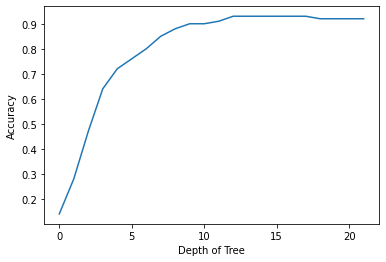

In [96]:
#Data for pruning with 1 tree
accuracies = [0.14, 0.28, 0.47, 0.64, 0.72, 0.76, 0.8, 0.85, 0.88, 0.9, 0.9, 0.91, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 0.92]
n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
plt.figure()
plt.plot(n, accuracies)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

In [129]:
def induce_random_decision_tree(instances, labels, num_attributes_per_tree, depth=0):
    """Induce a random decision tree for a given dataset

    Args:
    instances (numpy.ndarray): Instances, numpy array of shape (N, K)
                       N is the number of instances
                       K is the number of attributes
    labels (numpy.ndarray): Class labels, numpy array of shape (N, )
                       Each element in labels is a str
    num_attributes_per_tree (int): Number of attributes to be used in each tree
    Returns:
      DecisionNode: A decision node object which contains the attribute, value, left node, right node and depth
    """

    # Get a shuffled array of the indexes of the attributes
    random_indexes = default_rng().permutation(len(instances[0, :]))
    # Take the first attributes_per_tree indexes
    random_indexes_in_each_tree = random_indexes[:num_attributes_per_tree]
    # Create a new np array with only the attributes we want
    new_instances = instances[:, random_indexes_in_each_tree]

    # Find the best split point for the data
    best_attr, best_split = find_best_node(new_instances, labels)

    sorted_indices = instances[
        :, best_attr
    ].argsort()  # returns sorted instance indices based on the best attribute
    sorted_instances = instances[sorted_indices]  # sort the instances
    sorted_labels = labels[sorted_indices]  # sort the labels

    # Split the total dataset based on the best split point
    (
        split_instances_left,
        split_instances_right,
        split_labels_left,
        split_labels_right,
    ) = split_dataset(sorted_instances, sorted_labels, best_split)

    # If we can no longer split data, return a leaf node
    if (
        len(set(labels)) == 1
        or len(split_instances_left) == 0
        or len(split_instances_right) == 0
    ):
        return Leaf_Node(labels, depth)

    # Otherwise return a decision node
    LeftNode = induce_decision_tree(
        split_instances_left,
        split_labels_left,
        num_attributes_per_tree,
        depth + 1,
    )
    RightNode = induce_decision_tree(
        split_instances_right,
        split_labels_right,
        num_attributes_per_tree,
        depth + 1,
    )

    # Remap the best attribute its original index
    best_attr = random_indexes_in_each_tree[best_attr]

    # what to return if left node or right node does not exist
    return Decision_Node(
        best_attr, sorted_instances[best_split][best_attr], LeftNode, RightNode, depth
    )

decision_trees = []
number_of_trees = 2

#Read in data
train_instances, train_labels = read_dataset("data/train_full.txt")
test_instances, test_labels = read_dataset("data/test.txt")

#Get number of attributes in the dataset
num_attributes = len(train_instances[0, :])
#Take the square root of number of attributes and round up (optimal number of attibutes per tree?)
attributes_per_tree = math.ceil(np.sqrt(num_attributes))


# Loop through number of trees and train each tree
for i in range(0, number_of_trees):
    # Create a new random combination of the row indexes from new_instances
    random_row_indexes = default_rng().choice(len(x_train), len(x_train))
    new_instances = x_train[random_row_indexes, :]
    new_labels = x_train[random_row_indexes]

    # Now we have the new instances and labels, we can create a new decision tree
    new_decision_tree = induce_random_decision_tree(
        new_instances, new_labels, attributes_per_tree
    )
    decision_trees.append(new_decision_tree)

    
predictions1 = []
for i in test_instances:
    votes = []
    for j in range(len(decision_trees)):
        votes.append(decision_trees[j].predict(i))
    most_voted_label = max(set(votes), key=votes.count)
    predictions1.append(most_voted_label)

print(accuracy(test_labels, predictions1))
confusion = confusion_matrix(test_labels, np.array(predictions1))
print(confusion)
(p, macro_p) = precision(test_labels, np.array(predictions1))
print("precison:", p)
print("macro prec:", macro_p)
(r, macro_r) = recall(test_labels, np.array(predictions1))
print("recall", r)
print("macro recall:", macro_r)
(f1, macro_f1) = f1_score(test_labels, np.array(predictions1))
print("f1:", f1)
print("macro f1:", macro_f1)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [116]:
#Final evaluation of model with random forests 
def induce_pruned_decision_tree(instances, labels, max_depth, depth=0):
  #Find the best split points for the two 
  best_attr, best_split = find_best_node(instances, labels)

  sorted_indices = instances[:, best_attr].argsort() # returns sorted indices
  sorted_instances = instances[sorted_indices] # sort the instances based off sorted col
  sorted_labels = labels[sorted_indices] # sort the labels based off the sorted col

  #Split the total dataset based on the best split point
  split_instances_left, split_instances_right, split_labels_left, split_labels_right = split_dataset(sorted_instances, sorted_labels, best_split)

  #If we can no longer split data, return a leaf node
  if len(set(labels)) == 1 or len(split_instances_left) == 0 or len(split_instances_right) == 0:
    return Leaf_Node(labels, depth)

  if depth == max_depth:
    return Leaf_Node(labels, depth)

  LeftNode = induce_pruned_decision_tree(split_instances_left, split_labels_left, max_depth, depth+1)
  RightNode = induce_pruned_decision_tree(split_instances_right, split_labels_right, max_depth,depth+1) 

  # what to return if left node or right node does not exist
  return Decision_Node(best_attr, sorted_instances[best_split][best_attr], LeftNode, RightNode, depth)


#Read in data
train_instances, train_labels = read_dataset("data/train_full.txt")
test_instances, test_labels = read_dataset("data/test.txt")

root = induce_pruned_decision_tree(train_instances, train_labels, 15)

predictions = []
for i in test_instances:
  predictions.append(root.predict(i))

print(accuracy(test_labels, predictions))




0.915
